#**BANK CUSTOMER CHURN PREDICTION**

##**OBJECTIVE**
###**The objective of this project is to build a model that predicts whether a customer will churn or not**

##**DATA SOURCE**
### Here is the generated data dictionary for the provided dataset columns:

**CustomerId**: Unique identifier for each customer

**Surname**: Last name of the customer

**CreditScore**: Credit score of the customer

**Geography**: Location of the customer

**Gender**: Gender of the customer

**Age**: Age of the customer

**Tenure**: Number of years the customer has been with the company

**Balance**: Account balance of the customer

**Num Of Products**: Number of products the customer has purchased

**Has Credit Card**: Indicates if the customer has a credit card

**Is Active Member**: Indicates if the customer is an active member

**Estimated Salary**: Estimated salary of the customer

**Churn**: Indicates if the customer has churned

## **IMPORTING LIBRARIES**

In [1]:
#importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

##**IMPORT DATA**

In [2]:
#importing the data from dataset
df=pd.read_csv('/content/drive/MyDrive/Datasets/Bank Churn Modelling.csv')

In [3]:
#displaying the top 5 entries of Dataset
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
#information about Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


##**DESCRIBE DATA**

In [5]:
#Statistical Description of Dataset
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
#Checking for Null Values
df.isna().sum()

CustomerId          0
Surname             0
CreditScore         0
Geography           0
Gender              0
Age                 0
Tenure              0
Balance             0
Num Of Products     0
Has Credit Card     0
Is Active Member    0
Estimated Salary    0
Churn               0
dtype: int64

In [7]:
#Checking for Duplicate values
df.duplicated(keep='first')

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

##**DATA VISUALIZATION**

<Axes: xlabel='Gender', ylabel='count'>

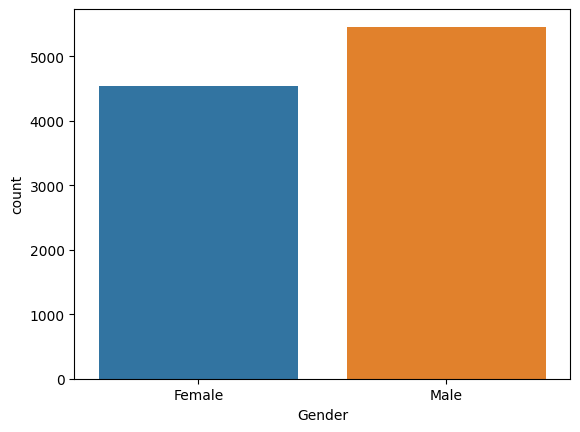

In [8]:
sns.countplot(x='Gender',data=df)

##**DATA PREPROCESSING**

In [9]:
df['Gender']=df['Gender'].apply(lambda x:1 if x=='Male' else 0)

In [10]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [11]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for columns in df[['Geography']]:
  df[columns]=le.fit_transform(df[columns])


In [13]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0


##**Defining Target Variable (y) and Feature Variables (X)**

In [14]:
X=df.drop(['CustomerId','Surname','Churn'],axis=1)
y=df['Churn']

##**Train Test Split**

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

##**Modeling**

In [16]:
model=SVC()
model.fit(X_train,y_train)

SVC()

##**Prediction**

In [17]:
pred=model.predict(X_test)

##**Model Evaluation**

In [18]:
cr=classification_report(y_test,pred)
print(cr)

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1595
           1       0.00      0.00      0.00       405

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.64      0.80      0.71      2000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##**SCALING**

In [19]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [20]:
model.fit(X_train,y_train)

SVC()

In [21]:
new_pred=model.predict(X_test)

In [22]:
c_report=classification_report(y_test,new_pred)
print(c_report)

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1595
           1       0.85      0.39      0.53       405

    accuracy                           0.86      2000
   macro avg       0.86      0.68      0.72      2000
weighted avg       0.86      0.86      0.84      2000



##**Explaination**
###**Thus we have Successfully build a SVM model that accurately classifies whether a customer will churn or not. The Accuracy of the model was 86%**